In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2

# Load the CSV files as DataFrames
compstak_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\compstak.csv')
doe_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\DOE.csv')

In [18]:
# Display column names in both DataFrames to confirm they exist
print("Columns in compstak_df:\n", compstak_df.columns.tolist())
print("\nColumns in doe_df:\n", doe_df.columns.tolist())

Columns in compstak_df:
 ['Property Type', 'Property Subtype', 'Property Id', 'State']

Columns in doe_df:
 ['statecode', 'reported_propertytype', 'reported_propertysubtype']


In [19]:
# Display unique values in each DataFrame
print("Unique values in 'Property Type' from compstak_df:")
# Convert values to strings before sorting to handle mixed types
property_type_values = [str(val) for val in compstak_df['Property Type'].dropna().unique()]
print(sorted(property_type_values))
print("\nNumber of unique values (excluding NaN):", len(property_type_values))

print("\nUnique values in 'reported_propertytype' from doe_df:")
reported_property_values = [str(val) for val in doe_df['reported_propertytype'].dropna().unique()]
print(sorted(reported_property_values))
print("\nNumber of unique values (excluding NaN):", len(reported_property_values))

Unique values in 'Property Type' from compstak_df:
['Hotel', 'Industrial', 'Land', 'Mixed-Use', 'Multi-Family', 'Office', 'Other', 'Retail']

Number of unique values (excluding NaN): 8

Unique values in 'reported_propertytype' from doe_df:
['Flex', 'General Retail', 'Health Care', 'Hospitality', 'Industrial', 'Multi-Family', 'Office', 'Retail', 'Specialty', 'Sports & Entertainment', 'Unknown']

Number of unique values (excluding NaN): 11


In [20]:
# Display unique values in each DataFrame for Property Subtype
print("Unique values in 'Property Subtype' from compstak_df:")
property_subtype_values = [str(val) for val in compstak_df['Property Subtype'].dropna().unique()]
print(sorted(property_subtype_values))
print("\nNumber of unique values (excluding NaN):", len(property_subtype_values))

print("\nUnique values in 'reported_propertysubtype' from doe_df:")
reported_propertysubtype_values = [str(val) for val in doe_df['reported_propertysubtype'].dropna().unique()]
print(sorted(reported_propertysubtype_values))
print("\nNumber of unique values (excluding NaN):", len(reported_propertysubtype_values))

Unique values in 'Property Subtype' from compstak_df:
['Apartments', 'Assembly/Meeting Place', 'Automotive', 'Bank', 'Business Park', 'Communication/Data Center', 'Community Shopping Center', 'Community/Recreation Center', 'Condominium', 'Convenience/Strip Center', 'Creative', 'Day Care Facility', 'Department Store', 'Drive Thru', 'Educational/School', 'Financial Building', 'Flex/R&D', 'Freestanding', 'Fuel & Service Station', 'Funeral/Mortuary', 'General Retail', 'Heavy Industrial', 'Hospital/Healthcare Facility', 'Hospitality Related', 'Housing', 'Industrial Outdoor Storage', 'Inline', 'Life Science/Lab', 'Light Industrial', 'Live/Work', 'Manufacturing', 'Medical/Healthcare', 'Mixed-Use', 'Mobile Home Park', 'Municipality/Public Service', 'Neighborhood Shopping Center', 'Outlet', 'Parking', 'Processing', 'Professional Building', 'Refrigerated/Cold Storage', 'Restaurant/Bar', 'Self-Storage', 'Senior Housing', 'Shopping Centers', 'Showroom', 'Special Industrial', 'Special Purpose', 'Sp

In [21]:
# Check for NaN values in the columns
print("NaN values in 'Property Type' column of compstak_df:", compstak_df['Property Type'].isna().sum())
print("NaN values in 'reported_propertytype' column of doe_df:", doe_df['reported_propertytype'].isna().sum())
print("NaN values in 'Property Subtype' column of compstak_df:", compstak_df['Property Subtype'].isna().sum())
print("NaN values in 'reported_propertysubtype' column of doe_df:", doe_df['reported_propertysubtype'].isna().sum())

NaN values in 'Property Type' column of compstak_df: 37020
NaN values in 'reported_propertytype' column of doe_df: 0
NaN values in 'Property Subtype' column of compstak_df: 213255
NaN values in 'reported_propertysubtype' column of doe_df: 516271


In [22]:
# Calculate and print percentage of NaN values in 'Property Subtype' column
nan_count_subtype = compstak_df['Property Subtype'].isna().sum()
total_rows = len(compstak_df)
print(f"NaN values in 'Property Subtype': {nan_count_subtype} / {total_rows}")
percentage_nan_subtype = (nan_count_subtype / total_rows) * 100
print(f"Percentage of NaN values in 'Property Subtype': {percentage_nan_subtype:.2f}%")

# Calculate and print percentage of NaN values in 'Property Type' column
nan_count_type = compstak_df['Property Type'].isna().sum()
print(f"NaN values in 'Property Type': {nan_count_type} / {total_rows}")
percentage_nan_type = (nan_count_type / total_rows) * 100
print(f"Percentage of NaN values in 'Property Type': {percentage_nan_type:.2f}%")

NaN values in 'Property Subtype': 213255 / 759623
Percentage of NaN values in 'Property Subtype': 28.07%
NaN values in 'Property Type': 37020 / 759623
Percentage of NaN values in 'Property Type': 4.87%


In [23]:
# Compare unique entries (converting to string and lowercase for fair comparison)
unique_property_compstak = {str(val).lower() for val in compstak_df['Property Type'].dropna().unique()}
unique_reported_property_doe = {str(val).lower() for val in doe_df['reported_propertytype'].dropna().unique()}

# Check if the unique entries are the same (case insensitive)
are_entries_same = unique_property_compstak == unique_reported_property_doe

print("Are the unique entries the same?", are_entries_same)

if not are_entries_same:
    print("\nEntries in compstak_df 'Property Type' but not in doe_df 'reported_propertytype':")
    print(sorted(unique_property_compstak - unique_reported_property_doe))
    print("\nEntries in doe_df 'reported_propertytype' but not in compstak_df 'Property Type':")
    print(sorted(unique_reported_property_doe - unique_property_compstak))

Are the unique entries the same? False

Entries in compstak_df 'Property Type' but not in doe_df 'reported_propertytype':
['hotel', 'land', 'mixed-use', 'other']

Entries in doe_df 'reported_propertytype' but not in compstak_df 'Property Type':
['flex', 'general retail', 'health care', 'hospitality', 'specialty', 'sports & entertainment', 'unknown']


In [24]:
# Create sets of property types from each dataset (case insensitive)
compstak_property_types = {str(val).lower() for val in compstak_df['Property Type'].dropna().unique()}
doe_property_types = {str(val).lower() for val in doe_df['reported_propertytype'].dropna().unique()}

# Find overlapping categories
overlapping_categories = compstak_property_types.intersection(doe_property_types)

print(f"Number of overlapping categories: {len(overlapping_categories)}")
print("\nOverlapping categories:")
for category in sorted(overlapping_categories):
    print(f"- {category}")

# Calculate percentages of overlap
compstak_overlap_percentage = (len(overlapping_categories) / len(compstak_property_types)) * 100
doe_overlap_percentage = (len(overlapping_categories) / len(doe_property_types)) * 100

print(f"\nPercentage of CompStak categories that overlap with DOE: {compstak_overlap_percentage:.2f}%")
print(f"Percentage of DOE categories that overlap with CompStak: {doe_overlap_percentage:.2f}%")

Number of overlapping categories: 4

Overlapping categories:
- industrial
- multi-family
- office
- retail

Percentage of CompStak categories that overlap with DOE: 50.00%
Percentage of DOE categories that overlap with CompStak: 36.36%


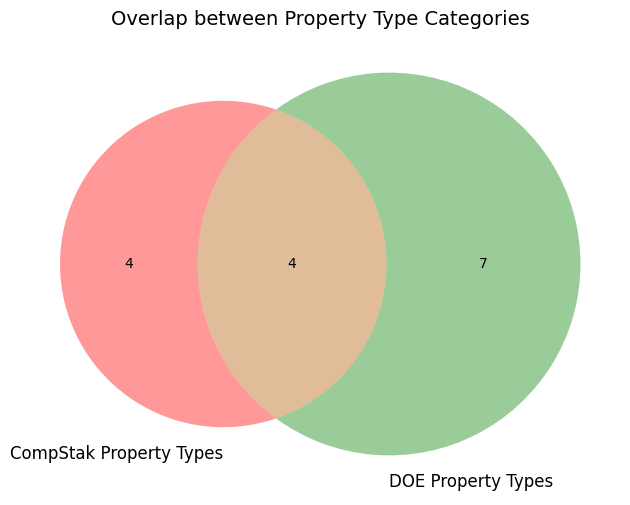

In [25]:
# Create a Venn diagram to visualize overlap between property type categories
plt.figure(figsize=(10, 6))
venn2([compstak_property_types, doe_property_types], 
      set_labels=('CompStak Property Types', 'DOE Property Types'))

plt.title('Overlap between Property Type Categories', fontsize=14)
plt.savefig('../Images/plots/property_type_overlap_venn.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# Create a more detailed analysis of category distribution

# Prepare data for visualization
category_comparison = pd.DataFrame({
    'Category': sorted(compstak_property_types.union(doe_property_types)),
    'In CompStak': [cat in compstak_property_types for cat in sorted(compstak_property_types.union(doe_property_types))],
    'In DOE': [cat in doe_property_types for cat in sorted(compstak_property_types.union(doe_property_types))]
})

# Count occurrences of each category in both datasets
compstak_counts = compstak_df['Property Type'].str.lower().value_counts().to_dict()
doe_counts = doe_df['reported_propertytype'].str.lower().value_counts().to_dict()

# Add count columns
category_comparison['CompStak Count'] = category_comparison['Category'].apply(lambda x: compstak_counts.get(x, 0))
category_comparison['DOE Count'] = category_comparison['Category'].apply(lambda x: doe_counts.get(x, 0))

# Add overlap status column
category_comparison['Status'] = category_comparison.apply(
    lambda row: 'In Both' if row['In CompStak'] and row['In DOE'] else 
                ('CompStak Only' if row['In CompStak'] else 'DOE Only'), 
    axis=1
)

# Display the comparison table
display(category_comparison.sort_values('Status'))

,Category,In CompStak,In DOE,CompStak Count,DOE Count,Status
4,hotel,True,False,4969,0,CompStak Only
6,land,True,False,49983,0,CompStak Only
7,mixed-use,True,False,3707,0,CompStak Only
10,other,True,False,9792,0,CompStak Only
0,flex,False,True,0,78783,DOE Only
1,general retail,False,True,0,15,DOE Only
2,health care,False,True,0,30641,DOE Only
3,hospitality,False,True,0,57189,DOE Only
12,specialty,False,True,0,161950,DOE Only
13,sports & entertainment,False,True,0,11966,DOE Only


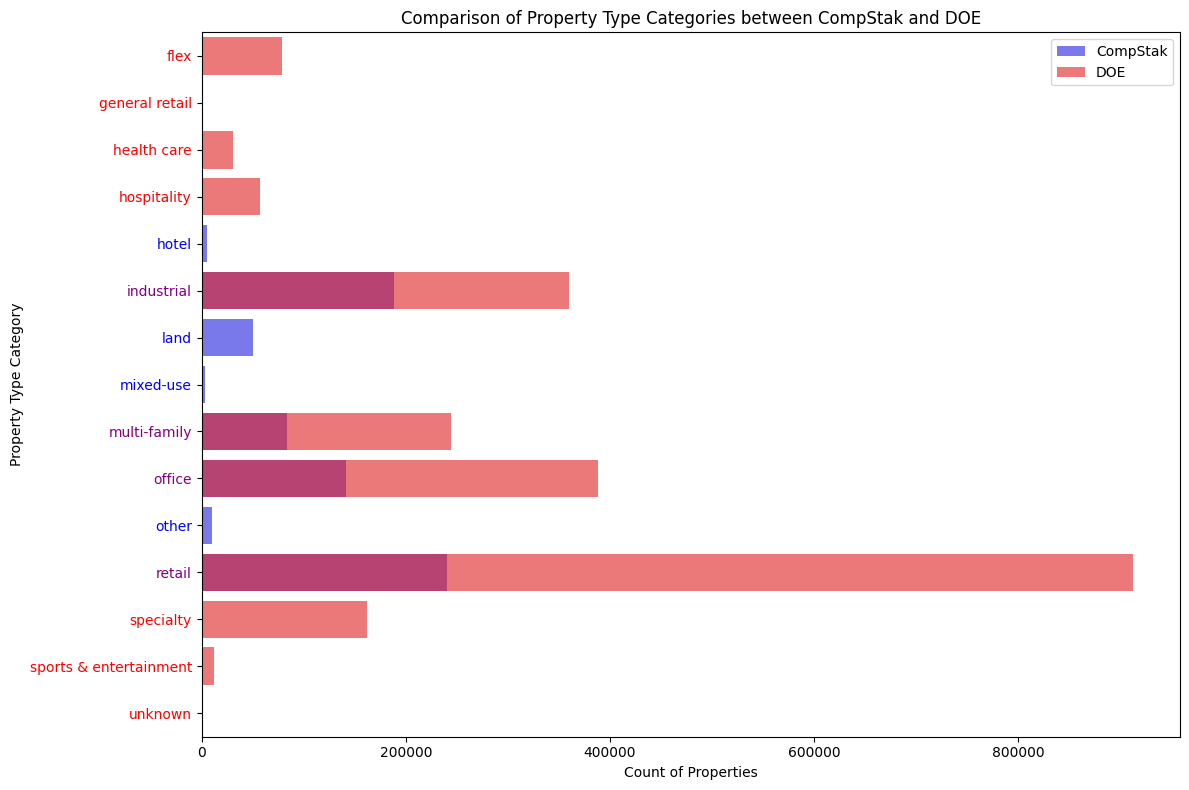

In [27]:
# Create a horizontal bar chart comparing category counts
plt.figure(figsize=(12, max(8, len(category_comparison) * 0.4)))

# Plot
ax = sns.barplot(data=category_comparison, y='Category', x='CompStak Count', color='blue', alpha=0.6, label='CompStak')
sns.barplot(data=category_comparison, y='Category', x='DOE Count', color='red', alpha=0.6, label='DOE')

# Add labels and title
plt.xlabel('Count of Properties')
plt.ylabel('Property Type Category')
plt.title('Comparison of Property Type Categories between CompStak and DOE')
plt.legend()

# Color-code the y-axis labels based on overlap status
for i, status in enumerate(category_comparison['Status']):
    if status == 'In Both':
        color = 'purple'
    elif status == 'CompStak Only':
        color = 'blue'
    else:  # DOE Only
        color = 'red'
    ax.get_yticklabels()[i].set_color(color)

plt.tight_layout()
plt.savefig('../Images/plots/property_type_comparison_chart.png', dpi=300, bbox_inches='tight')
plt.show()